<a href="https://colab.research.google.com/github/Rsorianoclever/MISTI-GTL-AI-Peru-2026-Program/blob/main/Richard_Soriano_MISTIPeru_IntrotoFeatureEngineering_Images_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**


# Introduction to Feature Engineering with PyTorch and MNIST Images

In this exercise, we will explore image data using MNIST. [MNIST](http://yann.lecun.com/exdb/mnist/) is a data set of handwritten digits.

In [29]:
# Import necessary Python modules for various tasks

# --- Data Access & File Handling ---
from google.colab import drive  # Access Google Drive for file storage
import io  # Handle I/O operations (e.g., reading files)
import os  # Interact with the operating system (e.g., file paths)

# --- Data Visualization ---
from matplotlib import pyplot as plt  # Create plots and visualizations

# --- Data Manipulation ---
import pandas as pd  # Data analysis and manipulation (DataFrames)
import numpy as np  # Numerical computations and array manipulations

# --- Image Processing ---
from scipy.ndimage import rotate  # Rotate images (used in image augmentation)

# --- Machine Learning Models ---
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.decomposition import PCA  # Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.preprocessing import StandardScaler  # Standardize data before training
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier

# --- Parallel Processing ---
import multiprocessing  # Manage processes for parallel computing
from joblib import delayed, Parallel  # Simplified parallel processing

# --- Plotting Configuration ---
import matplotlib.pyplot as plt  # Import for additional plotting capabilities
import seaborn as sns

# --- Performance Measurement ---
import time  # Measure execution time for performance benchmarking

# --- Mathematical Functions ---
import random  # Generate random numbers

# --- Error Metrics ---
from sklearn.metrics import accuracy_score  # Calculate model accuracy

# --- Deep Learning (PyTorch) ---
import torch  # PyTorch framework for building and training neural networks
import torchvision  # Utility functions for computer vision tasks
from torchvision import datasets, transforms  # Image datasets and transformations
from torch.utils.data import DataLoader  # Load data efficiently in batches
import torch
import torch.nn as nn
import torch.optim as optim

## Load and Explore Data

In [30]:
# Define a transformation to load the dataset as tensors
transform = transforms.ToTensor()

# Download and load the training set
dataset_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the test set
dataset_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Print the number of samples in each set
print(f"Training set size: {len(dataset_train)}")
print(f"Test set size: {len(dataset_test)}")

Training set size: 60000
Test set size: 10000


### EXERCISE: Explore the MNIST Data

In this exercise, we'll explore the MNIST dataset by examining individual images.

Tasks:
1. Randomly generate images. To do this, write a line of code that generates a random integer between 0 and the length of the dataset - 1 and assign it to the variable `random_idx`. Then generate 5 sample images.
2. Extract the labels from the training and testing datasets using `dataset.targets.to_numpy()` and plot a histogram of the labels to look at the distribution of classes.
3. In order to feed an image into a feedforward neural network model, we must unwrap it in a vector form. Visualize an unwrapped image example. Why might this unwrapping process remove valuable information? What valuable information might be removed during this unwrapping process?

#### TASK 1: Explore the MNIST Dataset

Randomly generate images. To do this, write a line of code that generates a random integer between 0 and the length of the dataset - 1 and assign it to the variable `random_idx`. Then generate 5 sample images.

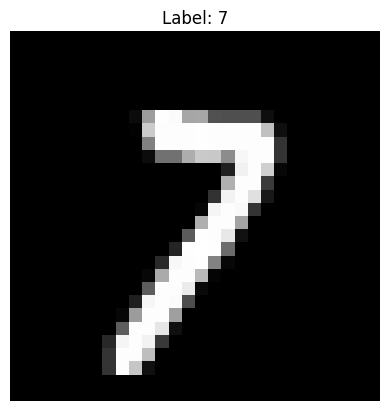

In [31]:
# TASK 1 EXERCISE

# Pick a random index
random_idx = random.randint(0, len(dataset_train) - 1)

# Extract the image and label
image, label = dataset_train[random_idx]

# Convert the image tensor to a NumPy array for visualization
image_np = image.squeeze().numpy()  # Remove channel dimension for grayscale image

# Plot the image
plt.imshow(image_np, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

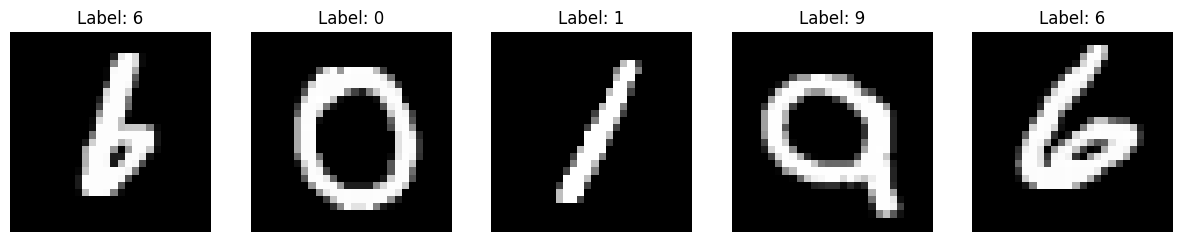

In [32]:
num_images = 5

fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
for i in range(num_images):
    random_idx = random.randint(0, len(dataset_train) - 1)
    image, label = dataset_train[random_idx]
    image_np = image.squeeze().numpy()

    # Plot
    axes[i].imshow(image_np, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()


#### TASK 2: Look at the Dataset Labels

Extract the labels from the training and testing datasets using `dataset.targets.to_numpy()` and plot a histogram of the labels to look at the distribution of classes.

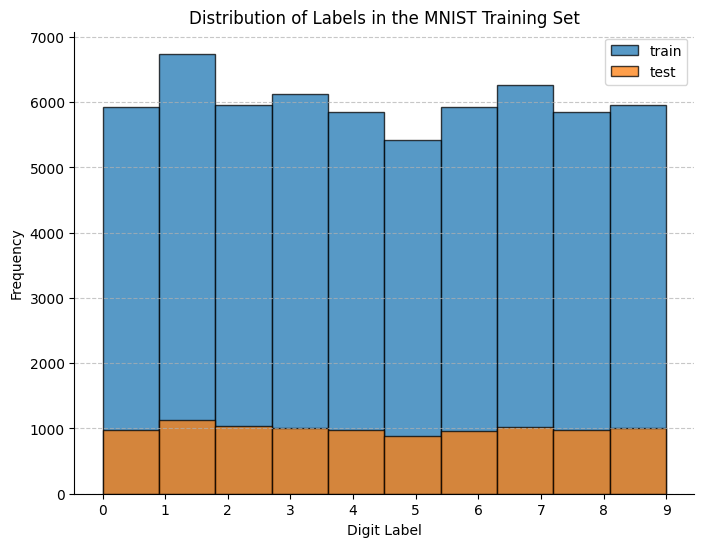

In [33]:
# TASK 2 EXERCISE

# Extract labels
labels_train = dataset_train.targets.numpy() # Convert tensor to numpy array for plotting
labels_test = dataset_test.targets.numpy() # Convert tensor to numpy array for plotting

# Plot the histogram of labels
plt.figure(figsize=(8, 6))
plt.hist(labels_train, bins=10, edgecolor='black', alpha=0.75, label = 'train')
plt.hist(labels_test, bins=10, edgecolor='black', alpha=0.75, label = 'test')
plt.title('Distribution of Labels in the MNIST Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()



#### TASK 3: Look at an Unwrapped Image

In order to feed an image into a feedforward neural network model, we must unwrap it in a vector form. Visualize an unwrapped image example. Why might this unwrapping process remove valuable information? What valuable information might be removed during this unwrapping process?

In [34]:
dataset_train.data[0].shape # shape of one image

torch.Size([28, 28])

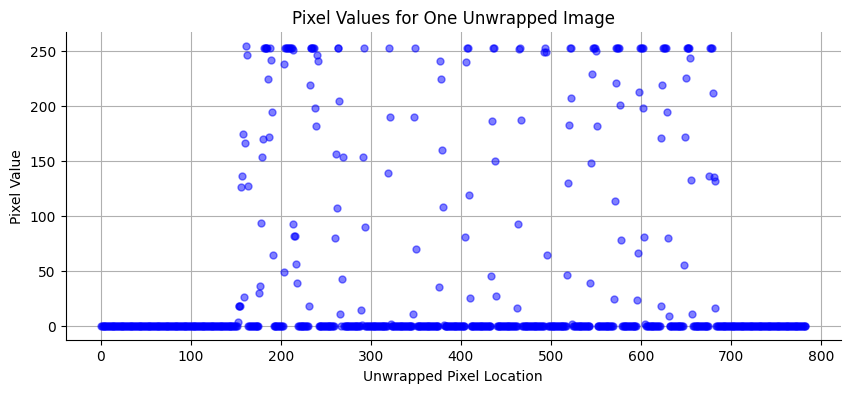

In [35]:
# TASK 3 EXERCISE

# Unwrap an image
#data_unwrapped = dataset_train.data[0].view(-1).numpy()
data_unwrapped = dataset_train.data[0].reshape(-1)

# Plot the pixel values of the first unwrapped image (row 0) in the training dataset
plt.figure(figsize=(10, 4))
plt.plot(data_unwrapped, 'bo', markersize=5, alpha = .5)
plt.title('Pixel Values for One Unwrapped Image')
plt.ylabel('Pixel Value')
plt.xlabel('Unwrapped Pixel Location')
plt.grid(True)
sns.despine()
plt.show()
# Unwrap an image


### DataLoaders

This code creates a DataLoader to load the MNIST dataset in batches of 5, converting images to tensors and shuffling the data for training. It automatically downloads the dataset if not already present.

In [36]:
data_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('sample_data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=5, shuffle=True)

#### EXERCISE: Explore a DataLoader

In this exercise, we'll explore how to use PyTorch's DataLoader class to efficiently load and process batches of image data. The DataLoader is a crucial tool for handling large datasets and implementing efficient training pipelines.

Tasks:
1. Run the following code and take note of the structure of a PyTorch dataloader.

##### TASK 1: Explore a DataLoader

Batch 1:
Images shape: torch.Size([5, 1, 28, 28])
Labels: tensor([0, 0, 5, 9, 2])


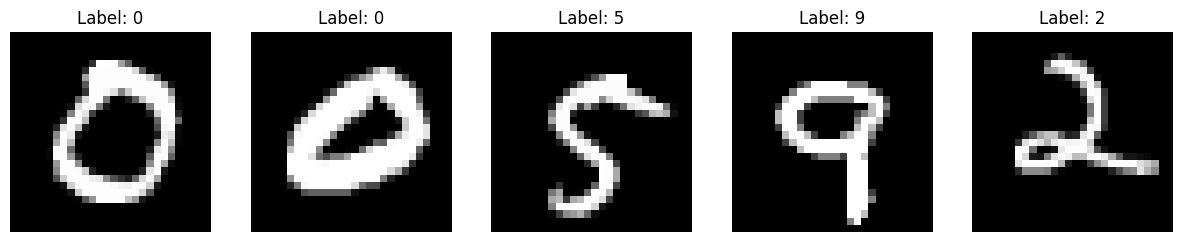

Batch 2:
Images shape: torch.Size([5, 1, 28, 28])
Labels: tensor([3, 3, 6, 6, 3])


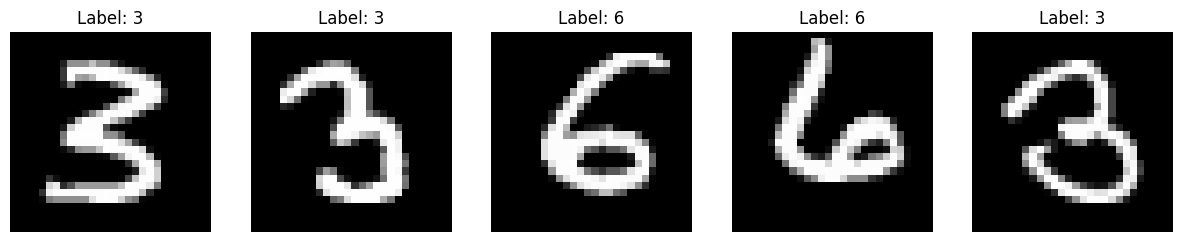

Batch 3:
Images shape: torch.Size([5, 1, 28, 28])
Labels: tensor([5, 9, 2, 7, 5])


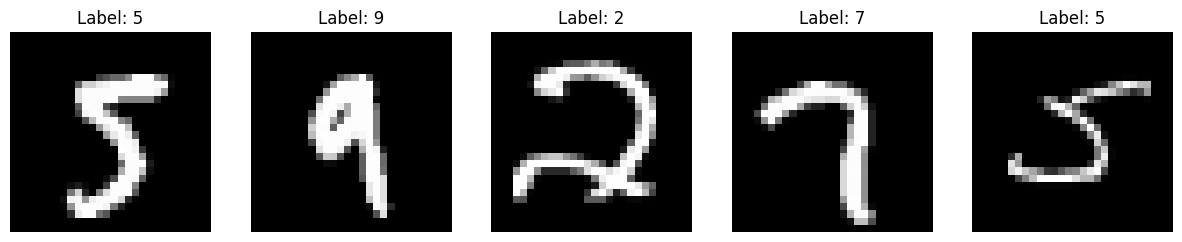

Batch 4:
Images shape: torch.Size([5, 1, 28, 28])
Labels: tensor([2, 3, 4, 9, 1])


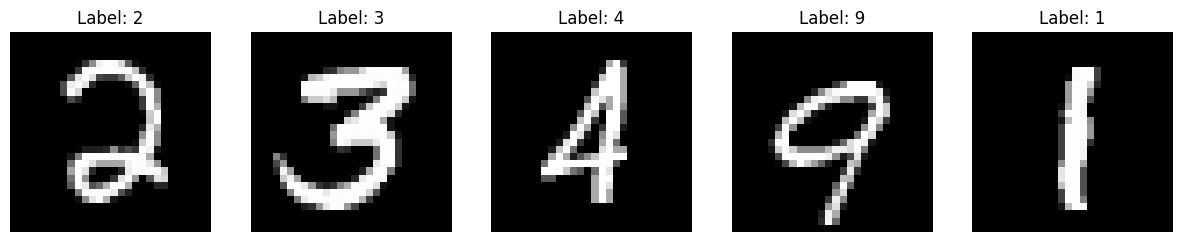

Batch 5:
Images shape: torch.Size([5, 1, 28, 28])
Labels: tensor([3, 7, 7, 5, 1])


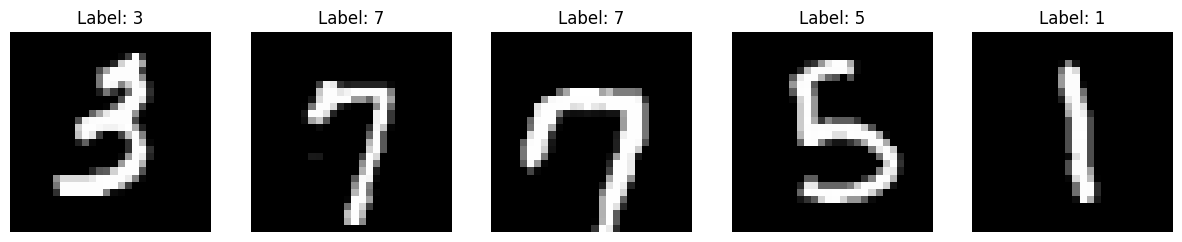

In [37]:
# TASK 1 EXERCISE AND SOLUTION

# Iterate through the DataLoader
for batch_idx, (images, labels) in enumerate(data_loader):

    print(f"Batch {batch_idx + 1}:")
    print(f"Images shape: {images.shape}")  # Shape: (batch_size, channels, height, width)
    print(f"Labels: {labels}")  # Labels for the batch

    batch_size = images.shape[0]

    fig, axes = plt.subplots(1, batch_size, figsize=(15, 5))
    for i in range(batch_size):
        img = images[i].squeeze().numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Label: {labels[i].item()}')
    plt.show()

    # Break after first 5 batches for demonstration
    if batch_idx == 4:
      break

## Standardize Data

### EXERCISE: Calculate the Mean and Standard Deviation of the MNIST Dataset Pixels

Tasks:
1. Calculate the mean and standard deviation of the images in the MNIST dataset using the `torch.Tensor()` functions `.mean()` and `.std()` which are commonly used in PyTorch to compute the mean and standard deviation of a tensor.
2. Use the calculated mean and standard deviation values to standardize your images using the PyTorch function `torchvision.transforms.Normalize(~)`.

  In `torchvision.transforms.Normalize()`, the term "normalize" actually refers to **standardization**, where pixel values are adjusted to have a **mean of 0** and **standard deviation of 1** using the formula $$x' = \frac{x - \mu}{\sigma}. $$Although technically a standardization process, it's called "normalize" in PyTorch due to historical usage in deep learning frameworks.

#### TASK 1: Calculate the Mean and Standard Deviation of the MNIST Dataset

Calculate the mean and standard deviation of the images in the MNIST dataset using the `torch.Tensor()` functions `.mean()` and `.std()` which are commonly used in PyTorch to compute the mean and standard deviation of a tensor.

In [39]:
# TASK 1 EXERCISE

# Use DataLoader for batch processing
loader = DataLoader(dataset_train, batch_size=64, shuffle=False)

# Initialize variables to calculate mean and std
mean = 0.0
std = 0.0
total_samples = 0

# Loop through the dataset
for images, _ in loader:
    # images shape: (batch_size, channels, height, width)
    batch_samples = images.size(0)  # Number of samples in the batch
    images = images.view(batch_samples, images.size(1), -1)  # Flatten height and width
    mean += images.mean(2).sum(0) # Mean across height and width, then sum batch
    std += images.std(2).sum(0) # Std across height and width, then sum batch
    total_samples += batch_samples

# Final mean and std
mean /= total_samples
std /= total_samples

print(f"Mean: {mean}")
print(f"Std: {std}")



Mean: tensor([0.1307])
Std: tensor([0.3015])


#### TASK 2: Standardize the MNIST Images

Use the calculated mean and standard deviation values to standardize your images using the PyTorch function `torchvision.transforms.Normalize(~)`.

/tmp/ipython-input-253214548.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit color bars


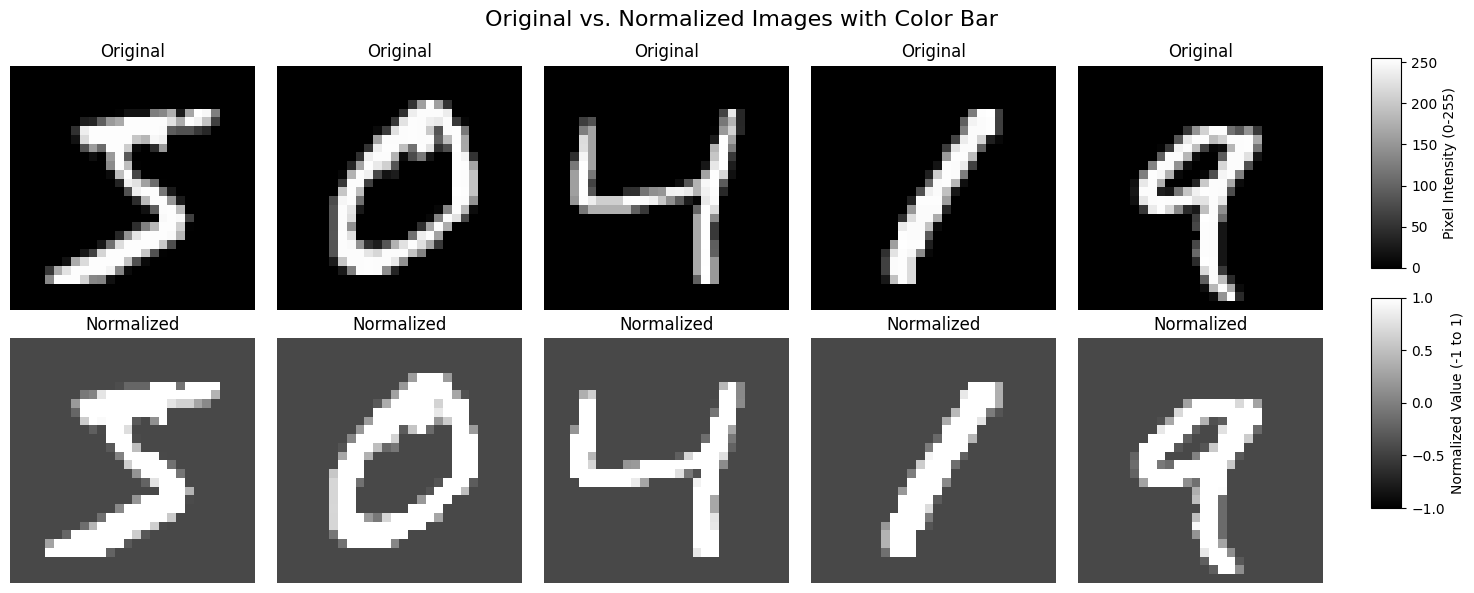

In [40]:
# TASK 2 EXERCISE

# Updated DataLoader with normalization
data_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        'sample_data/',
        train=True,
        download=True,
        transform = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((mean,), (std,))

        ])
    ),
    batch_size=1,
    shuffle=True
)

# Define visualization function with color bars for original and normalized images
def visualize_normalization_with_colorbar(data_loader, num_images=5):

    dataset = data_loader.dataset

    fig, axs = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle("Original vs. Normalized Images with Color Bar", fontsize=16)

    for i in range(num_images):

        # Original image (non-normalized)
        original_image = dataset.data[i].numpy()
        im1 = axs[0, i].imshow(original_image, cmap='gray', vmin=0, vmax=255)
        axs[0, i].axis('off')
        axs[0, i].set_title("Original")

        # Normalized image
        pil_image = transforms.ToPILImage()(dataset.data[i].unsqueeze(0))  # Convert to PIL.Image
        normalized_image = dataset.transform(pil_image).squeeze().numpy()
        im2 = axs[1, i].imshow(normalized_image, cmap='gray', vmin=-1, vmax=1)
        axs[1, i].axis('off')
        axs[1, i].set_title("Normalized")

    # Add color bars
    cbar_ax1 = fig.add_axes([0.92, 0.55, 0.02, 0.35])  # Position for the original images' color bar
    fig.colorbar(im1, cax=cbar_ax1, orientation='vertical', label='Pixel Intensity (0-255)')

    cbar_ax2 = fig.add_axes([0.92, 0.15, 0.02, 0.35])  # Position for the normalized images' color bar
    fig.colorbar(im2, cax=cbar_ax2, orientation='vertical', label='Normalized Value (-1 to 1)')

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit color bars
    plt.show()

# Visualize normalized images with color bars
visualize_normalization_with_colorbar(data_loader)


## Data Augmentation



This section extracts the MNIST dataset from the `data_loader`, converts it to a NumPy array, and displays the shape of the data matrix. It then selects a specific image from the dataset and defines a function, `plot_image()`, to visualize the image in grayscale using Matplotlib.

In [46]:
data = data_loader.dataset.data
data = np.array(data)
print('Shape of our MNIST Data Matrix: ' + str(data.shape))

image_index = 2
image_to_manipulate = data[image_index, :, :]

def plot_image(data):

  # Input = Index of the Image You Want to
  plt.figure()
  plt.imshow(data, cmap='gray')
  plt.title('Example Image from MNIST')
  plt.xlabel('Pixel')
  plt.ylabel('Pixel')
  plt.show()

Shape of our MNIST Data Matrix: (60000, 28, 28)


#### EXERCISE: Image Rotation and Flipping

Tasks:
Manipulate an image selected above with the following recommended functions:
1. `np.fliplr()`
2. `np.flipud()`
3. `rotate()` from `scipy.ndimage`
    - 80 degree rotation
    - 120 degree rotation

##### TASK 1: `np.fliplr()`

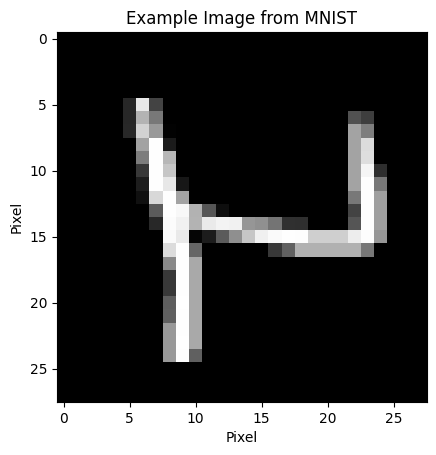

In [42]:
# TASK 1 EXERCISE

# Mirror Image with np.fliplr()
mirror = np.fliplr(image_to_manipulate)
plot_image(mirror)


##### TASK 2: `np.flipud()`

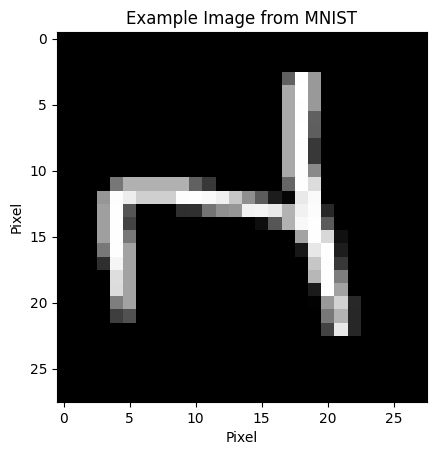

In [43]:
# TASK 2 EXERCISE

# Flip Image with np.flipud()
updown = np.flipud(image_to_manipulate)
plot_image(updown)

##### TASK 3: `rotate()`

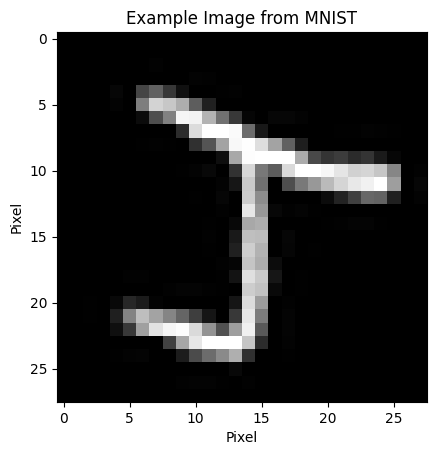

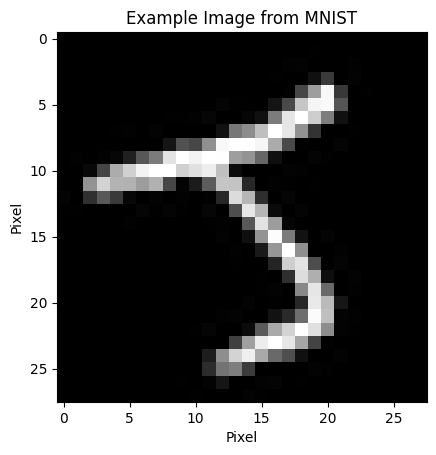

In [45]:
# TASK 3 EXERCISE

# rotate image by 80' with rotate() from scipy.ndimage
rot_80 = rotate(image_to_manipulate, 80, reshape=False)
plot_image(rot_80)

# rotate image by 120' with rotate() from scipy.ndimage
rot_120 = rotate(image_to_manipulate, 120, reshape=False)
plot_image(rot_120)

## Training a Neural Network with Data Augmentation

This section introduces the implementation of a **simple feedforward neural network** using PyTorch. It consists of three key components:

1. **Defining the Neural Network** – The `SimpleNN` class inherits from `nn.Module` and outlines a straightforward architecture with an input layer, one hidden layer with ReLU activation, and an output layer. This structure is suitable for tasks like image classification, where the input images are flattened before being passed through the network.

2. **Training the Model** – The `train_model` function handles the training process, iterating over the provided dataset for a specified number of epochs. It uses backpropagation to calculate gradients and updates the model's weights using an optimizer. The function also tracks and prints the average loss per epoch to monitor the model’s learning progress.

3. **Testing the Model** – The `test_model` function evaluates the trained model's performance on a separate test dataset. It calculates the overall accuracy by comparing the model’s predictions to the actual labels, providing a measure of how well the model generalizes to unseen data.

This comprehensive setup lays the foundation for building, training, and testing a neural network, forming a core part of many deep learning workflows.

In [47]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (784) to hidden layer (128)
        self.relu = nn.ReLU()               # Activation function
        self.fc2 = nn.Linear(128, 10)       # Hidden layer (128) to output layer (10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the training function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero out gradients
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}')

# Define the testing function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

### EXERCISE: Train a Neural Network

Tasks:
1. **Create a Basic Data Transformation Pipeline**
  - Create a variable called `transform_basic` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation.  
  - This transformation converts images to tensors and scales pixel values from the range `[0, 255]` to `[0, 1]`.
2. **Load the MNIST Training and Testing Data**
  - Use the `torchvision.datasets.MNIST()` function to download the training and testing datasets.  
  - Apply the `transform_basic` pipeline to both datasets.  
  - Name the variables `dataset_train` for the training data and `dataset_test` for the testing data.
3. **Create DataLoaders for Training and Testing**
  - Use the `DataLoader()` function to create `train_loader` and `test_loader` variables.  
  - Set `batch_size=64` for both loaders.  
  - Use `shuffle=True` for the training loader to randomize the order of images.  
  - Use `shuffle=False` for the testing loader to maintain consistent evaluation.
4. **Train and Test the Neural Network**
  - Run the provided code which goes through the following steps:
    - Initialize the model using the `SimpleNN()` class.  
    - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
    - Train the model for 5 epochs using the `train_model()` function.  
    - Test the model using the `test_model()` function and print the accuracy.

##### TASK 1: Create a basic data transformation pipeline

- Create a variable called `transform_basic` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation.  
- This transformation converts images to tensors and scales pixel values from the range `[0, 255]` to `[0, 1]`.

In [57]:
# TASK 1 EXERCISE

# Load dataset without augmentation
transform_basic = transforms.Compose([transforms.ToTensor()])  # Converts to tensor and scales [0, 255] to [0, 1]


##### TASK 2: Extract your Training and Testing Data

- Use the `torchvision.datasets.MNIST()` function to download the training and testing datasets.  
- Apply the `transform_basic` pipeline to both datasets.  
- Name the variables `dataset_train` for the training data and `dataset_test` for the testing data.

In [58]:
# TASK 2 EXERCISE

# Define Training and Testing Datasets
dataset_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform_basic)
dataset_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform_basic)

##### TASK 3: Create your DataLoaders

- Use the `DataLoader()` function to create `train_loader` and `test_loader` variables.  
- Set `batch_size=64` for both loaders.  
- Use `shuffle=True` for the training loader to randomize the order of images.  
- Use `shuffle=False` for the testing loader to maintain consistent evaluation.

In [59]:
# TASK 3 EXERCISE

# DataLoaders
train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

##### TASK 4: Train a Neural Network

  - Run the provided code which goes through the following steps:
    - Initialize the model using the `SimpleNN()` class.  
    - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
    - Train the model for 5 epochs using the `train_model()` function.  
    - Test the model using the `test_model()` function and print the accuracy.

In [51]:
# TASK 4 SOLUTION and EXERCISE

# Initialize model, criterion, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Train the model
print("Training model without standardization or augmentation...")
train_model(model, train_loader, criterion, optimizer, epochs=5)

# Test the model
print("\nTesting model without standardization or augmentation...")
test_accuracy = test_model(model, test_loader)

Training model without standardization or augmentation...
Epoch 1/5, Loss: 0.2622866136834089
Epoch 2/5, Loss: 0.10565396123873527
Epoch 3/5, Loss: 0.07404919273889204
Epoch 4/5, Loss: 0.05719028421015397
Epoch 5/5, Loss: 0.043492386391612764

Testing model without standardization or augmentation...
Accuracy: 97.51%


### EXERCISE: Train a Neural Network with Standardization

Now, let's build upon our previous exercise by incorporating data standardization into our neural network training process. We'll see how standardizing our input data can impact model performance.

Tasks:
1. **Create a Basic Data Transformation Pipeline**
  - Create a variable called `transform_std` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation, as well as the `torchvision.transforms.Normalize(~)` transformation.
2. **Load the MNIST Training and Testing Data**
  - Use the `torchvision.datasets.MNIST()` function to download the new training dataset.
  - Apply the `transform_std` pipeline to the training dataset  
  - Name the variables `dataset_train_std` for the training data.
3. **Create DataLoaders for Training and Testing**
  - Use the `DataLoader()` function to create `train_loader_std`.
  - Set `batch_size=64` for this new loader.  
  - Use `shuffle=True` for the training loader to randomize the order of images.
4. **Train and Test the Neural Network**
  - Run the provided code which goes through the following steps:
    - Initialize the model using the `SimpleNN()` class.  
    - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
    - Train the model for 5 epochs using the `train_model()` function.  
    - Test the model using the `test_model()` function and print the accuracy.

#### TASK 1: Create a Basic Data Transformation Pipeline
  - Create a variable called `transform_std` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation, as well as the `torchvision.transforms.Normalize(~)` transformation.

In [53]:
# TASK 1 EXERCISE

# Load dataset without augmentation
transform_std = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


#### TASK 2: Load the MNIST Training and Testing Data
  - Use the `torchvision.datasets.MNIST()` function to download the new training dataset.
  - Apply the `transform_std` pipeline to the training dataset  
  - Name the variables `dataset_train_std` for the training data.


In [54]:
# TASK 2 EXERCISE

# Create the new dataset
dataset_train_std = datasets.MNIST(root='./data', train=True, download=True, transform=transform_std)

#### TASK 3: Create DataLoaders for Training and Testing
  - Use the `DataLoader()` function to create `train_loader_std`.
  - Set `batch_size=64` for this new loader.  
  - Use `shuffle=True` for the training loader to randomize the order of images.

In [55]:
# TASK 3 EXERCISE

# Create the new DataLoader
train_loader_std = DataLoader(dataset_train_std, batch_size=64, shuffle=True)

#### TASK 4: Train and Test the Neural Network
- Run the provided code which goes through the following steps:
  - Initialize the model using the `SimpleNN()` class.  
  - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
  - Train the model for 5 epochs using the `train_model()` function.  
  - Test the model using the `test_model()` function and print the accuracy.

In [56]:
# TASK 4 SOLUTION AND EXERCISE

# Initialize model, criterion, and optimizer
model_std = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_std.parameters(), lr=0.01)

# Train the model
print("Training model with standardization...")
train_model(model_std, train_loader_std, criterion, optimizer, epochs=5)

# Test the model
print("\nTesting model with standardization...")
test_accuracy_std = test_model(model_std, test_loader)

Training model with standardization...
Epoch 1/5, Loss: 0.581499624131585
Epoch 2/5, Loss: 0.2982022112001107
Epoch 3/5, Loss: 0.25060754537836577
Epoch 4/5, Loss: 0.21832172054725923
Epoch 5/5, Loss: 0.19430676702338495

Testing model with standardization...
Accuracy: 92.78%


### EXERCISE: Train a Neural Network with Standardization and Data Augmentation

In this final exercise, we'll combine both data standardization and data augmentation techniques to create a more robust training pipeline and observe how these combined techniques affect model performance.

Tasks:
1. **Create a Data Transformation Pipeline with Data Augmentation**
  - Create a variable called `transform_aug_std` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation, the `torchvision.transforms.Normalize(~)` transformation and some data augmentation transformations. Some to add in include `transforms.RandomRotation(~)` and `transforms.RandomAffine(degrees=0, translate=(~, ~))`.
    - *Try using small values for the parameters to ensure that you don't manipulate the data to much so that it looks completely unlike the original dataset.*
2. **Load the Adjusted MNIST Training  Data**
  - Use the `torchvision.datasets.MNIST()` function to download the new training dataset.
  - Apply the `transform_aug_std` pipeline to the training dataset  
  - Name the variables `dataset_train_aug_std` for the training data.
3. **Create DataLoaders for Training**
  - Use the `DataLoader()` function to create `train_loader_aug_std`.
  - Set `batch_size=64` for this new loader.  
  - Use `shuffle=True` for the training loader to randomize the order of images.
4. **Train and Test the Neural Network**
  - Run the provided code which goes through the following steps:
    - Initialize the model using the `SimpleNN()` class.  
    - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
    - Train the model for 5 epochs using the `train_model()` function.  
    - Test the model using the `test_model()` function and print the accuracy.
5. ** Compare the Accuracies of the three Different Neural Networks **
  - Compare the accuracies of the three different models and come up with theories as to why the testing accuracies either increased or decreased with the adjusted transformation pipelines.

#### TASK 1: Create a Data Transformation Pipeline with Data Augmentation
  - Create a variable called `transform_aug_std` using `torchvision.transforms.Compose([~])` that applies the `torchvision.transforms.ToTensor()` transformation, the `torchvision.transforms.Normalize(~)` transformation and some data augmentation transformations. Some to add in include `transforms.RandomRotation(~)` and `transforms.RandomAffine(degrees=0, translate=(~, ~))`.
    - *Try using small values for the parameters to ensure that you don't manipulate the data to much so that it looks completely unlike the original dataset.*

In [61]:
# TASK 1 EXERCISE

# Load dataset with standardization and augmentation
transform_aug_std = transforms.Compose([
    transforms.RandomRotation(10), # Small rotation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Small shift
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


#### TASK 2: Load the adjusted MNIST Training
  - Use the `torchvision.datasets.MNIST()` function to download the new training dataset.
  - Apply the `transform_aug_std` pipeline to the training dataset  
  - Name the variables `dataset_train_aug_std` for the training data.


In [62]:
# TASK 2 EXERCISE

# Create the new dataset
dataset_train_aug_std = datasets.MNIST(root='./data', train=True, download=True, transform=transform_aug_std)

#### TASK 3: Create DataLoaders for Training
  - Use the `DataLoader()` function to create `train_loader_aug_std`.
  - Set `batch_size=64` for this new loader.  
  - Use `shuffle=True` for the training loader to randomize the order of images.

In [63]:
# TASK 3 EXERCISE

# Create the new DataLoader
train_loader_aug_std = DataLoader(dataset_train_aug_std, batch_size=64, shuffle=True)

#### TASK 4: Train and Test the Neural Network
  - Run the provided code which goes through the following steps:
    - Initialize the model using the `SimpleNN()` class.  
    - Define the loss function using `nn.CrossEntropyLoss()` and the optimizer using `optim.SGD()` with a learning rate of `0.01`.  
    - Train the model for 5 epochs using the `train_model()` function.  
    - Test the model using the `test_model()` function and print the accuracy.

In [64]:
# TASK 4 SOLUTION AND EXERCISE


# Initialize model, criterion, and optimizer
model_aug_std = SimpleNN()
optimizer_aug_std = optim.SGD(model_aug_std.parameters(), lr=0.01)

# Train the model
print("Training model with standardization and augmentation...")
train_model(model_aug_std, train_loader_aug_std, criterion, optimizer_aug_std, epochs=5)

# Test the model
print("\nTesting model with standardization and augmentation...")
test_accuracy_aug_std = test_model(model_aug_std, test_loader)

Training model with standardization and augmentation...
Epoch 1/5, Loss: 1.2420167405086795
Epoch 2/5, Loss: 0.7381472988868318
Epoch 3/5, Loss: 0.5239186709814234
Epoch 4/5, Loss: 0.4174934855020885
Epoch 5/5, Loss: 0.35540043171852637

Testing model with standardization and augmentation...
Accuracy: 87.14%


#### TASK 5: Compare the Accuracies of the three Different Neural Networks

- Compare the accuracies of the three different models and come up with theories as to why the testing accuracies either increased or decreased with the adjusted transformation pipelines.

In [ ]:
# Initialize lists to store accuracies
accuracies = []

# Test the basic model
print("\nTesting model without standardization or augmentation...")
test_accuracy = test_model(model, test_loader)
accuracies.append(("Basic Model", test_accuracy))

# Test the standardized model
print("\nTesting model with standardization...")
test_accuracy_std = test_model(model_std, test_loader)
accuracies.append(("Standardized Model", test_accuracy_std))

# Test the augmented + standardized model
print("\nTesting model with standardization and augmentation...")
test_accuracy_aug_std = test_model(model_aug_std, test_loader)
accuracies.append(("Augmented + Standardized Model", test_accuracy_aug_std))

# Print out all accuracies
print("\nSummary of Test Accuracies:")
for model_name, accuracy in accuracies:
    print(f"{model_name}: {accuracy:.2f}%")

# Appendix